In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILE_PATH_CSV_SCORES = './model3_final_scores.csv'

In [3]:
df_scores = pd.read_csv(FILE_PATH_CSV_SCORES,).reset_index().rename(columns={'index':'episode'})
df_scores['pct_valid'] = (df_scores['Steps'] - df_scores['Invalid_steps']) / df_scores['Steps']

df_scores.tail()

,episode,Result,Castle_size,Steps,Invalid_steps,pct_valid
206802,206802,Lose,9,24,13,0.458333
206803,206803,Lose,9,47,40,0.148936
206804,206804,Lose,7,20,2,0.900000
206805,206805,Lose,8,23,10,0.565217
206806,206806,Lose,7,89,69,0.224719


In [4]:
rolling_pct = .05
rolling_sample = int(len(df_scores) * rolling_pct)

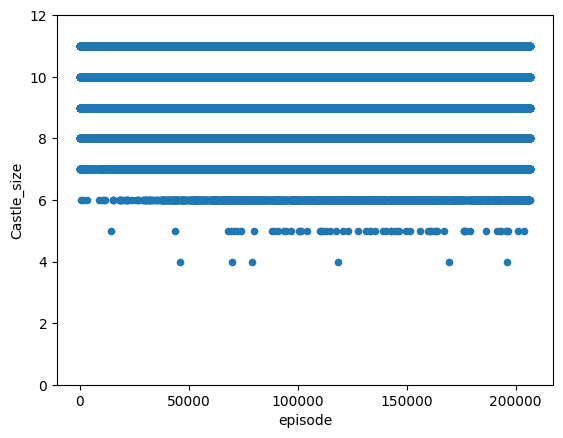

In [5]:
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Castle_size',
)

plt.ylim((0,12))
plt.show()

In [6]:
best_castle = min(df_scores['Castle_size'])
df_scores.query(f'Castle_size == {best_castle}') 

,episode,Result,Castle_size,Steps,Invalid_steps,pct_valid
45871,45871,Lose,4,115,89,0.226087
69775,69775,Lose,4,238,210,0.117647
79156,79156,Lose,4,65,32,0.507692
118523,118523,Lose,4,439,403,0.082005
169339,169339,Lose,4,217,188,0.133641
196205,196205,Lose,4,707,670,0.052334


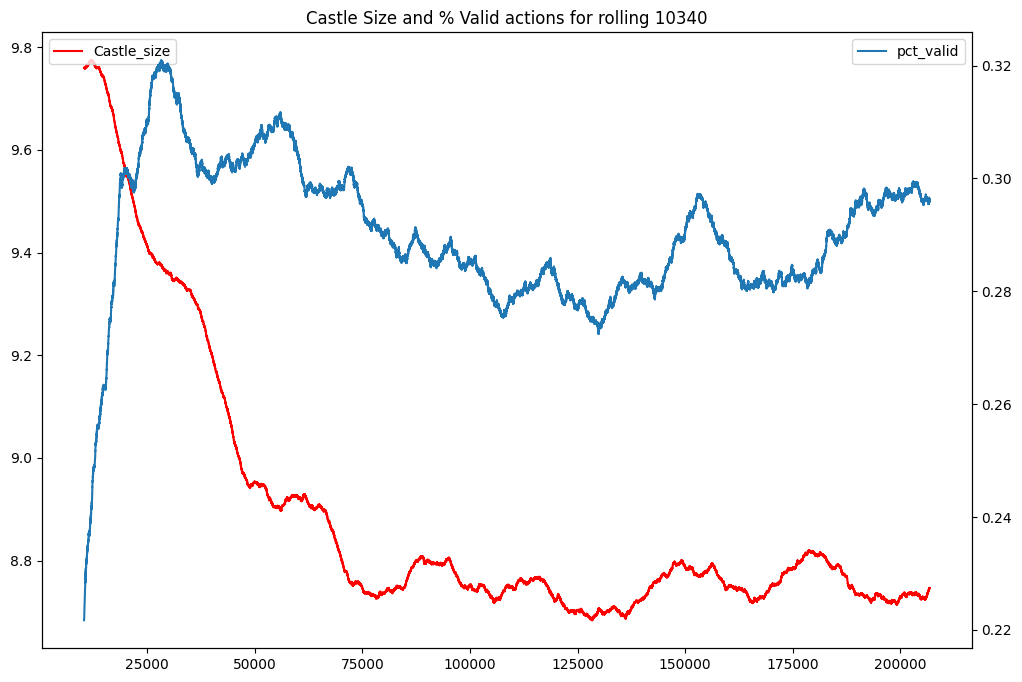

In [7]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot()
df_scores['Castle_size'].rolling(rolling_sample).mean().plot(ax=ax1, color='Red',)
ax1.legend(loc='upper left')
ax2 = plt.twinx()
df_scores['pct_valid'].rolling(rolling_sample).mean().plot(ax=ax2,)
ax2.legend(loc=1)
plt.title(f'Castle Size and % Valid actions for rolling {rolling_sample}')
plt.show()

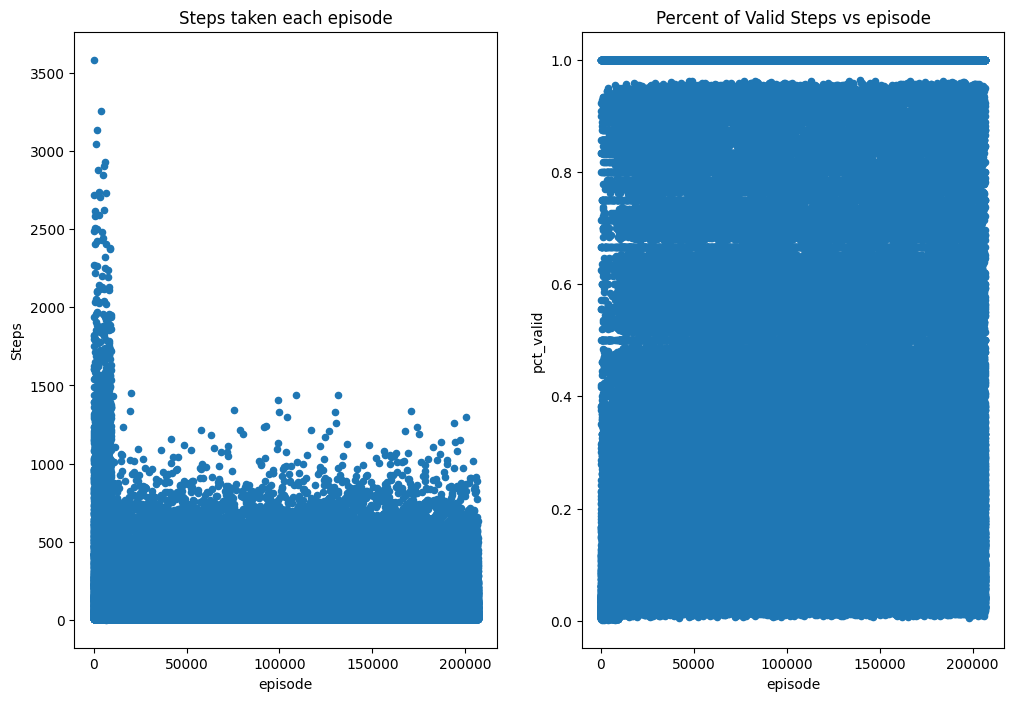

In [8]:
plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Steps',
    title = 'Steps taken each episode',
    ax=ax,
)
ax = plt.subplot(1,2,2)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='pct_valid',
    title = 'Percent of Valid Steps vs episode',
    ax=ax,
)
plt.show()

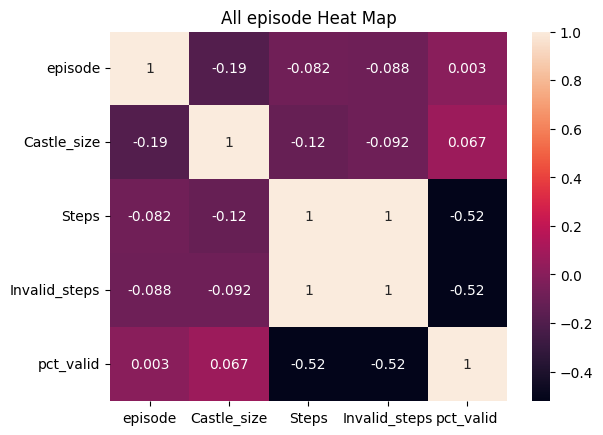

In [9]:
heat_data = df_scores.corr(numeric_only=True)
sns.heatmap(heat_data, annot=True)
plt.title('All episode Heat Map')
plt.show()

In [10]:
len(df_scores)

206807

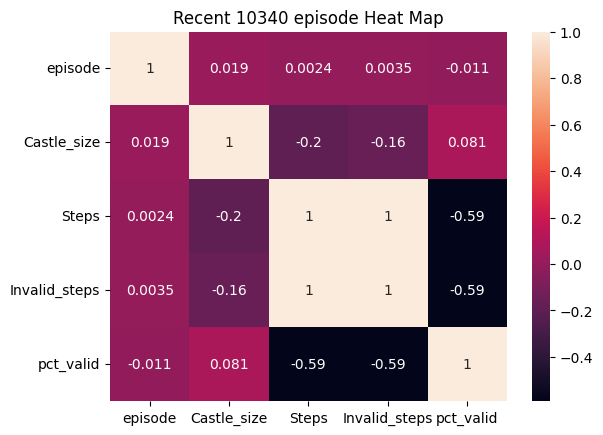

In [11]:
heat_data = df_scores.iloc[-rolling_sample:,:].corr(numeric_only=True)
sns.heatmap(heat_data, annot=True)
plt.title(f'Recent {rolling_sample} episode Heat Map')
plt.show()

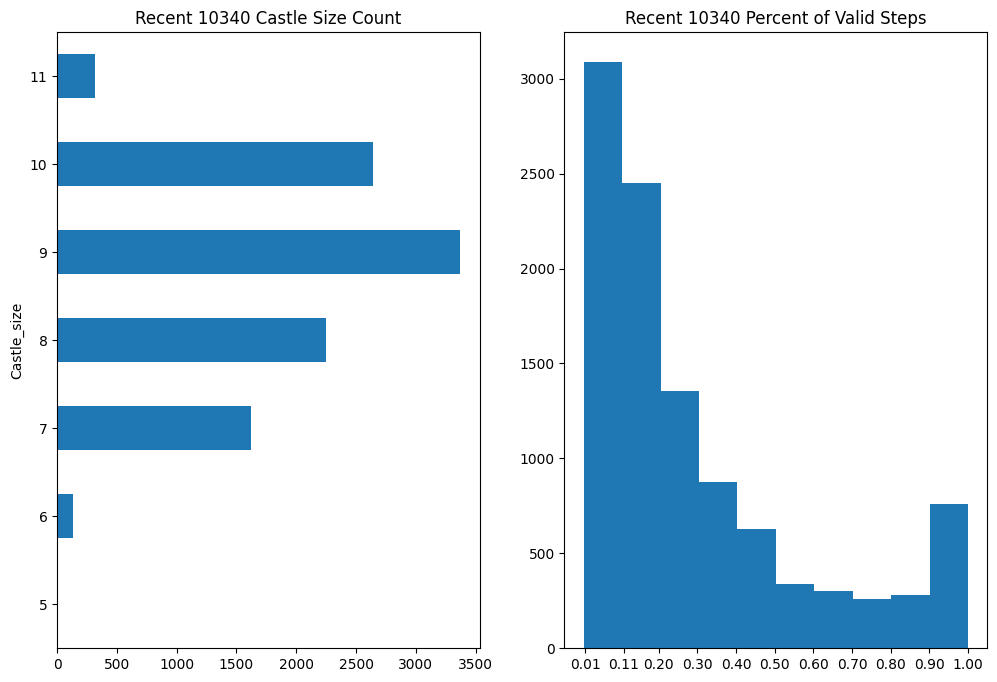

In [12]:
df_scores_recent = df_scores.iloc[-rolling_sample:,:]

plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
df_scores_recent.groupby('Castle_size').count()['episode'].plot(
    kind='barh',
    title = f'Recent {rolling_sample} Castle Size Count',
    ax=ax,
)
ax = plt.subplot(1,2,2)
bins = plt.hist(x=df_scores_recent['pct_valid'],
            )
ticks = [round(tick,2) for tick in bins[1]]
ax.set_xticks(ticks)
plt.title(f'Recent {rolling_sample} Percent of Valid Steps')
plt.show()